In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

/home/eleh/miniconda3/envs/muygps/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Analysis of PCA results for max only normalizations

In [2]:
results = pd.read_csv('muygps_pca_embeded-results.csv', index_col=0)
#rename index to rroot istead of nthroot
results.index = results.index.str.replace('nthroot', 'rroot')
results.index = results.index.str.replace('_', '-')
# drop row with norm_11 index since it does not follow nomenclature
# note that this normalzation does not perform any better
# results.drop('norm_11', inplace=True)
results

,2-cps,3-cps,4-cps,5-cps,6-cps,7-cps,8-cps,9-cps,10-cps,11-cps,...,41-cps,42-cps,43-cps,44-cps,45-cps,46-cps,47-cps,48-cps,49-cps,50-cps
rroot-003448,66.226,67.694,69.162,70.116,73.253,67.896,70.354,71.143,71.253,71.895,...,74.629,74.812,76.757,76.353,75.161,76.903,76.243,76.793,76.133,77.013
rroot-006897,65.841,67.657,68.428,70.794,69.143,70.794,69.840,71.235,70.391,72.060,...,73.950,71.326,74.720,71.858,76.316,76.793,75.032,75.362,76.170,75.491
rroot-01034,65.823,67.859,69.547,70.464,69.547,71.125,70.501,69.712,71.088,71.638,...,72.519,76.408,74.885,76.591,74.005,76.738,75.656,75.491,76.463,74.665
rroot-01379,65.970,67.786,69.455,69.253,70.226,69.822,70.959,71.326,71.381,70.593,...,72.390,72.170,76.408,76.059,76.500,75.564,75.216,75.894,76.573,76.059
rroot-01724,66.171,67.639,69.327,70.281,68.409,70.959,71.253,71.491,69.694,72.445,...,75.913,75.197,75.087,75.161,76.610,73.326,76.445,72.097,73.088,75.326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rroot-mm08966,64.208,67.602,69.565,71.528,71.730,72.831,73.234,74.427,76.738,74.408,...,76.738,75.582,74.977,77.600,75.876,77.289,77.123,78.371,75.968,75.307
rroot-mm0931,64.117,66.245,69.327,71.547,72.262,72.317,73.711,74.353,73.858,74.959,...,76.775,76.114,76.830,80.811,77.178,77.123,76.922,76.867,77.068,77.729
rroot-mm09655,64.795,66.832,69.418,71.712,72.262,72.904,73.528,74.408,76.243,81.013,...,75.124,75.711,75.729,75.344,76.573,76.940,77.454,76.903,77.766,75.381
rroot-mm10,64.300,72.409,69.804,71.381,72.409,73.106,72.904,74.995,75.234,74.298,...,75.271,79.233,75.968,75.949,76.591,76.812,77.050,76.830,76.371,78.811


In [3]:
# create a column to store the max component  of each row
results['max-column'] = results.iloc[:, 1:].idxmax(axis=1)
# create a column to store the max value of each row
results['Accuracy (%)'] = results.iloc[:, 2:-1].max(axis=1)
results

,2-cps,3-cps,4-cps,5-cps,6-cps,7-cps,8-cps,9-cps,10-cps,11-cps,...,43-cps,44-cps,45-cps,46-cps,47-cps,48-cps,49-cps,50-cps,max-column,Accuracy (%)
rroot-003448,66.226,67.694,69.162,70.116,73.253,67.896,70.354,71.143,71.253,71.895,...,76.757,76.353,75.161,76.903,76.243,76.793,76.133,77.013,39-cps,79.545
rroot-006897,65.841,67.657,68.428,70.794,69.143,70.794,69.840,71.235,70.391,72.060,...,74.720,71.858,76.316,76.793,75.032,75.362,76.170,75.491,46-cps,76.793
rroot-01034,65.823,67.859,69.547,70.464,69.547,71.125,70.501,69.712,71.088,71.638,...,74.885,76.591,74.005,76.738,75.656,75.491,76.463,74.665,39-cps,76.775
rroot-01379,65.970,67.786,69.455,69.253,70.226,69.822,70.959,71.326,71.381,70.593,...,76.408,76.059,76.500,75.564,75.216,75.894,76.573,76.059,49-cps,76.573
rroot-01724,66.171,67.639,69.327,70.281,68.409,70.959,71.253,71.491,69.694,72.445,...,75.087,75.161,76.610,73.326,76.445,72.097,73.088,75.326,45-cps,76.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rroot-mm08966,64.208,67.602,69.565,71.528,71.730,72.831,73.234,74.427,76.738,74.408,...,74.977,77.600,75.876,77.289,77.123,78.371,75.968,75.307,36-cps,81.416
rroot-mm0931,64.117,66.245,69.327,71.547,72.262,72.317,73.711,74.353,73.858,74.959,...,76.830,80.811,77.178,77.123,76.922,76.867,77.068,77.729,44-cps,80.811
rroot-mm09655,64.795,66.832,69.418,71.712,72.262,72.904,73.528,74.408,76.243,81.013,...,75.729,75.344,76.573,76.940,77.454,76.903,77.766,75.381,30-cps,81.673
rroot-mm10,64.300,72.409,69.804,71.381,72.409,73.106,72.904,74.995,75.234,74.298,...,75.968,75.949,76.591,76.812,77.050,76.830,76.371,78.811,12-cps,80.976


/tmp/ipykernel_2701278/2580742875.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


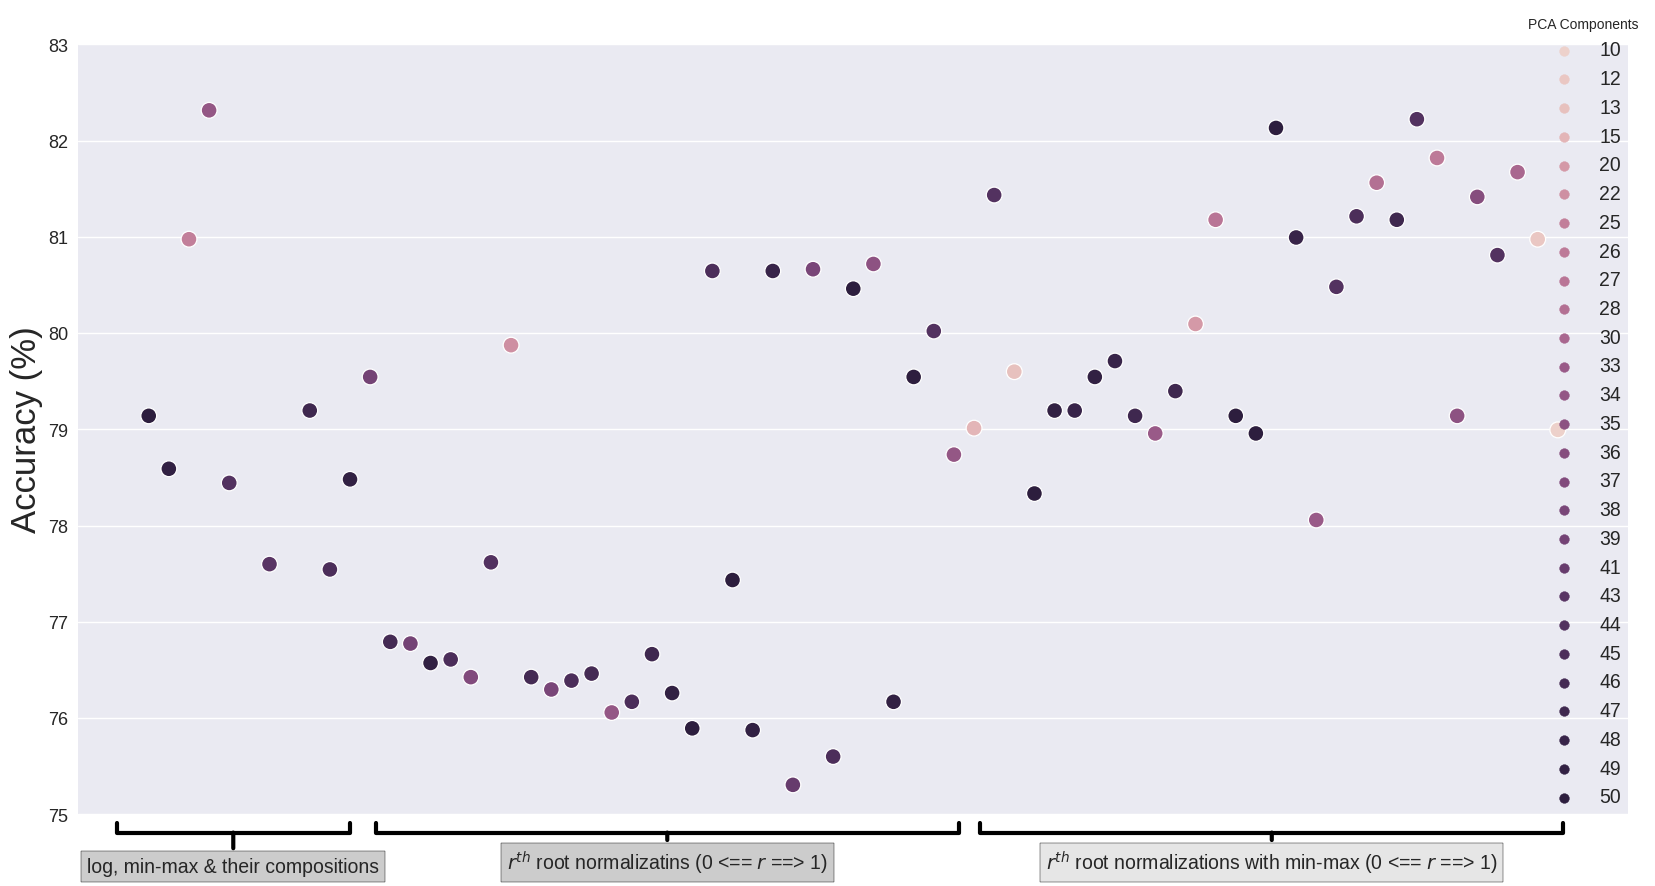

In [4]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
results.iloc[:, -2:]
sorted_hue = results['max-column'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
# sns.scatterplot(data=results, x=results.index, y='Accuracy (%)', hue='max-column', s=130)
# sort the normalizatin names to observe the trend
norm_names = results.index.tolist()
results = results.reindex(sorted(norm_names))
pl = sns.scatterplot(data=results, x=results.index, y='Accuracy (%)', hue=sorted_hue, s=130, legend='full')
pl.legend_.set_title('PCA Components')
plt.xticks(rotation=85)
# plt.legend(loc=(.96, 0.15))
plt.legend(loc=(.93, -0.0), title='PCA Components', fontsize=14)
# sns.set_context("paper", rc={"font.size":50,"axes.titlesize":15,"axes.labelsize":15})   
# pl.axes.set_title("MUYGPS on Different PCA Components and Normalizations",fontsize=30)
# pl.set_xlabel("Normalizations",fontsize=25)
pl.set_ylabel("Accuracy (%)",fontsize=25)
pl.tick_params(labelsize=13)



# turn xticks off
plt.xticks([])

plt.annotate(r'log, min-max & their compositions' , xy=(0.1, -0.02), xytext=(0.1, -0.08),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=6.0, lengthB=.5', lw=3.0))

plt.annotate(r'$r^{th}$ root normalizatins (0 <== $r$ ==> 1)', xy=(0.38, -0.02), xytext=(0.38, -0.08),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=15.0, lengthB=.5', lw=3.0))

plt.annotate(r'$r^{th}$ root normalizations with min-max (0 <== $r$ ==> 1)', xy=(0.77, -0.02), xytext=(0.77, -0.08),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            bbox=dict(boxstyle='square', fc='0.9'),
            arrowprops=dict(arrowstyle='-[, widthB=15.0, lengthB=.5', lw=3.0))
plt.ylim(75, 83)
plt.savefig('muygps_pca_embeded-results.png', dpi=500, bbox_inches='tight')

plt.show()

In [5]:
# return indices of the top 4 accuracy
top_4_norms = results['Accuracy (%)'].nlargest(4).index
top_4_norms

Index(['norm-21', 'rroot-mm07931', 'rroot-mm05517', 'rroot-mm08276'], dtype='object')

In [6]:
top_pca = results.loc[['raw-image-data','norm-21', 'rroot-mm07931', 'rroot-mm05517', 'rroot-mm08276'], :].iloc[:, :-2]
top_pca

,2-cps,3-cps,4-cps,5-cps,6-cps,7-cps,8-cps,9-cps,10-cps,11-cps,...,41-cps,42-cps,43-cps,44-cps,45-cps,46-cps,47-cps,48-cps,49-cps,50-cps
raw-image-data,70.134,71.895,74.573,74.005,74.152,74.647,75.014,75.344,75.582,75.656,...,78.463,78.426,78.224,78.298,78.279,78.353,78.279,78.316,78.481,78.371
norm-21,65.181,67.107,68.960,69.804,70.996,71.638,72.611,72.977,73.950,74.518,...,73.656,77.527,79.086,80.316,77.068,80.536,80.737,78.022,77.674,77.619
rroot-mm07931,65.694,67.584,69.308,70.831,72.023,78.279,73.564,73.840,74.500,75.124,...,77.545,76.426,80.297,82.223,77.344,77.692,76.628,77.967,77.949,76.958
rroot-mm05517,65.823,67.400,69.143,73.895,71.363,71.968,72.390,72.941,76.151,74.041,...,76.922,77.619,78.004,78.224,76.261,76.041,76.977,77.032,78.958,82.132
rroot-mm08276,64.043,67.419,69.198,70.611,71.638,72.812,73.583,74.390,74.702,75.161,...,76.426,77.123,75.032,77.087,77.747,77.123,77.619,77.564,77.655,77.435


/tmp/ipykernel_2701278/2915725940.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


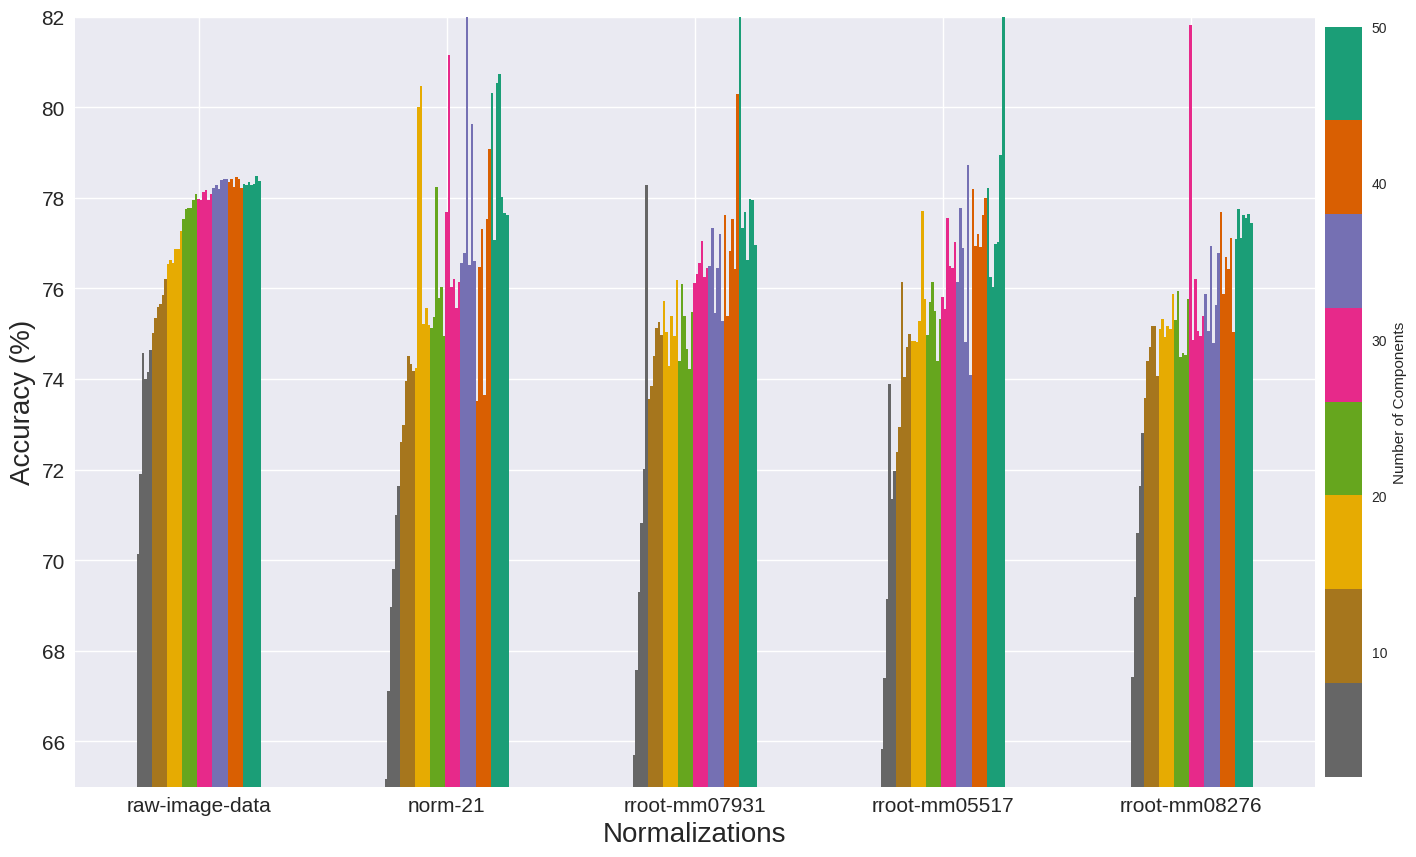

In [7]:
ax = top_pca.plot(figsize=(20,10),  kind='bar', cmap='Dark2_r', legend=False)
ax.set_xticklabels(top_pca.index, rotation=0)
ax.set_xlabel('Normalizations')
ax.set_ylabel('Accuracy (%)')
# ax.set_title(r'MUYGPS Top 4 Normalizations on PCA Across 2-50 Components')
ax.set_ylim(65, 82)
# add colobar to the plot
sm = plt.cm.ScalarMappable(cmap='Dark2_r', norm=plt.Normalize(vmin=2, vmax=50))
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_label('Number of Components')
# customize the positin of the colorbar
cbar.ax.set_position([.75, .12, .05, .75])
# increase the size of setlabels
ax.tick_params(labelsize=15)
# increase the size of titles and labels
ax.title.set_size(25)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.savefig('top_pca.png', dpi=500, bbox_inches='tight')
plt.show()

### Analysis of Supervised UMAP results for max only normalizations

In [8]:
# MUYGPS keeps killing the model and so had to split the results into two files. Load the the two files and combine them
result1 = pd.read_csv('muygps-umap-results-max-onlyl.csv', index_col=0)
result2 = pd.read_csv('muygps-umap-results-max-only.csv', index_col=0)
results_umap = pd.concat([result1, result2])
# rename index to rroot istead of nthroot 
results_umap.index = results_umap.index.str.replace('nth', 'r') 
# rename index to rroot istead of nthroot 
results_umap.index = results_umap.index.str.replace('_', '-')
results_umap

,2-cps,3-cps,4-cps,5-cps,6-cps,7-cps,8-cps,9-cps,10-cps,11-cps,...,41-cps,42-cps,43-cps,44-cps,45-cps,46-cps,47-cps,48-cps,49-cps,50-cps
rroot-mm03448,81.343,81.416,81.526,81.471,81.526,81.453,81.508,81.123,81.563,81.471,...,81.435,81.508,81.435,81.563,81.490,81.508,81.545,81.361,81.600,81.398
rroot-04828,76.702,76.977,77.637,77.454,77.894,77.857,77.821,78.261,78.243,78.224,...,78.866,77.692,78.701,78.995,78.848,78.903,78.921,78.866,77.912,79.031
rroot-05172,76.059,77.068,77.545,77.289,77.729,77.674,78.114,77.986,77.564,78.206,...,79.215,79.013,79.453,79.233,79.343,78.921,79.325,79.196,79.233,79.068
norm-31,81.178,81.233,81.453,81.288,81.343,81.159,81.269,81.306,81.141,81.214,...,81.196,81.196,80.994,81.178,81.086,81.251,81.251,81.269,80.022,80.793
rroot-07931,77.545,76.885,78.096,78.187,78.444,77.949,78.151,78.426,78.628,78.481,...,79.325,79.270,79.563,78.958,79.545,79.270,79.655,79.655,79.673,79.618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rroot-mm08276,80.499,80.591,80.793,80.646,80.701,80.866,80.793,80.756,81.013,80.848,...,81.013,80.921,80.609,80.829,80.884,80.994,80.774,80.774,80.921,80.903
rroot-mm02414,81.068,81.325,81.343,81.269,81.416,81.343,81.526,81.508,81.398,81.361,...,81.398,81.288,81.361,81.435,81.343,81.343,81.159,81.288,81.306,81.343
norm-1,81.196,81.361,81.380,81.178,81.031,80.958,81.196,81.123,81.325,81.325,...,81.178,81.178,81.306,81.343,81.196,81.214,81.104,81.288,81.178,80.774
std-scaler,75.307,75.913,76.261,75.693,76.133,75.858,75.894,76.023,76.170,76.133,...,76.280,75.986,76.316,76.096,75.986,76.023,76.059,76.170,75.968,76.078


In [9]:
# create a column to store the max component  of each row
results_umap['max-column'] = results_umap.iloc[:, 1:].idxmax(axis=1)
# create a column to store the max value of each row
results_umap['Accuracy (%)'] = results_umap.iloc[:, 2:-1].max(axis=1)
results_umap

,2-cps,3-cps,4-cps,5-cps,6-cps,7-cps,8-cps,9-cps,10-cps,11-cps,...,43-cps,44-cps,45-cps,46-cps,47-cps,48-cps,49-cps,50-cps,max-column,Accuracy (%)
rroot-mm03448,81.343,81.416,81.526,81.471,81.526,81.453,81.508,81.123,81.563,81.471,...,81.435,81.563,81.490,81.508,81.545,81.361,81.600,81.398,14-cps,81.655
rroot-04828,76.702,76.977,77.637,77.454,77.894,77.857,77.821,78.261,78.243,78.224,...,78.701,78.995,78.848,78.903,78.921,78.866,77.912,79.031,33-cps,79.215
rroot-05172,76.059,77.068,77.545,77.289,77.729,77.674,78.114,77.986,77.564,78.206,...,79.453,79.233,79.343,78.921,79.325,79.196,79.233,79.068,28-cps,79.508
norm-31,81.178,81.233,81.453,81.288,81.343,81.159,81.269,81.306,81.141,81.214,...,80.994,81.178,81.086,81.251,81.251,81.269,80.022,80.793,4-cps,81.453
rroot-07931,77.545,76.885,78.096,78.187,78.444,77.949,78.151,78.426,78.628,78.481,...,79.563,78.958,79.545,79.270,79.655,79.655,79.673,79.618,25-cps,79.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rroot-mm08276,80.499,80.591,80.793,80.646,80.701,80.866,80.793,80.756,81.013,80.848,...,80.609,80.829,80.884,80.994,80.774,80.774,80.921,80.903,28-cps,81.049
rroot-mm02414,81.068,81.325,81.343,81.269,81.416,81.343,81.526,81.508,81.398,81.361,...,81.361,81.435,81.343,81.343,81.159,81.288,81.306,81.343,20-cps,81.581
norm-1,81.196,81.361,81.380,81.178,81.031,80.958,81.196,81.123,81.325,81.325,...,81.306,81.343,81.196,81.214,81.104,81.288,81.178,80.774,4-cps,81.380
std-scaler,75.307,75.913,76.261,75.693,76.133,75.858,75.894,76.023,76.170,76.133,...,76.316,76.096,75.986,76.023,76.059,76.170,75.968,76.078,43-cps,76.316


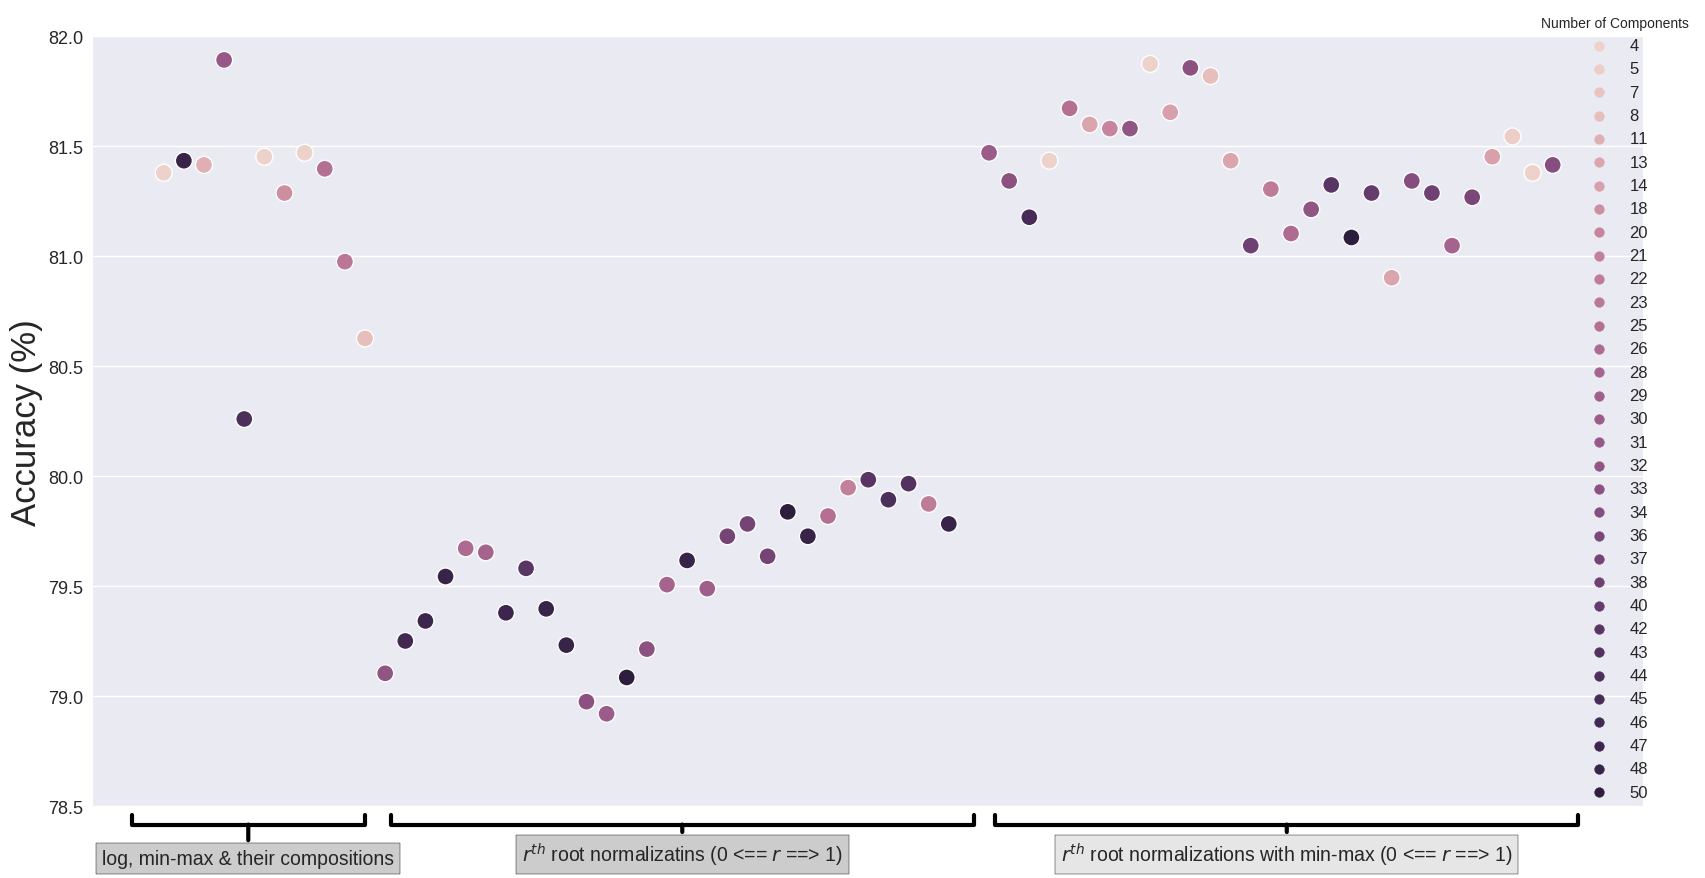

In [10]:

plt.figure(figsize=(20,10))
sorted_hue = results_umap['max-column'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
# sns.scatterplot(data=results, x=results.index, y='Accuracy (%)', hue='max-column', s=130)
# sort the normalizatin names to observe the trend
norm_names = results_umap.index.tolist()
results_umap = results_umap.reindex(sorted(norm_names))
pl = sns.scatterplot(data=results_umap, x=results_umap.index, y='Accuracy (%)', hue=sorted_hue, s=150, legend='full')
plt.xticks(rotation=85)

# plt.legend(loc=(.962, 0.05))
# sns.set_context("paper", rc={"font.size":50,"axes.titlesize":15,"axes.labelsize":15})   
# pl.axes.set_title("MUYGPS on Different Supervised UMAP Components and Normalizations",fontsize=30)
# pl.set_xlabel("Normalizations",fontsize=25)
pl.set_ylabel("Accuracy (%)",fontsize=25)
pl.tick_params(labelsize=13)
plt.legend(loc=(.93, 0.0), title='Number of Components', fontsize=12)


# turn xticks off
plt.xticks([])

plt.annotate(r'log, min-max & their compositions' , xy=(0.1, -0.02), xytext=(0.1, -0.08),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=6.0, lengthB=.5', lw=3.0))

plt.annotate(r'$r^{th}$ root normalizatins (0 <== $r$ ==> 1)', xy=(0.38, -0.02), xytext=(0.38, -0.08),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=15.0, lengthB=.5', lw=3.0))

plt.annotate(r'$r^{th}$ root normalizations with min-max (0 <== $r$ ==> 1)', xy=(0.77, -0.02), xytext=(0.77, -0.08),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            bbox=dict(boxstyle='square', fc='0.9'),
            arrowprops=dict(arrowstyle='-[, widthB=15.0, lengthB=.5', lw=3.0))
plt.ylim(78.5, 82)
plt.savefig('muygps_umap_embeded-results.png', dpi=500, bbox_inches='tight')
plt.show()

In [11]:
top_umap = results_umap.loc[['raw-image-data','norm-21', 'rroot-mm03103', 'rroot-mm03793', 'rroot-mm04138'], :].iloc[:, :-2]
top_umap

,2-cps,3-cps,4-cps,5-cps,6-cps,7-cps,8-cps,9-cps,10-cps,11-cps,...,41-cps,42-cps,43-cps,44-cps,45-cps,46-cps,47-cps,48-cps,49-cps,50-cps
raw-image-data,80.444,80.499,80.554,80.371,80.261,80.554,80.627,80.444,80.224,80.426,...,80.352,80.114,80.462,80.554,80.462,80.536,80.334,79.233,80.389,80.407
norm-21,81.178,81.783,81.618,81.453,81.600,81.380,81.526,81.655,81.655,81.490,...,81.783,81.691,81.820,81.746,81.765,81.618,81.581,81.691,81.802,81.728
rroot-mm03103,81.490,81.655,81.875,81.746,81.710,81.581,81.765,81.655,81.802,81.508,...,81.545,81.655,81.636,81.783,81.618,81.655,81.710,81.857,81.545,81.600
rroot-mm03793,81.416,81.710,81.710,81.673,81.802,81.838,81.710,81.765,81.710,81.728,...,81.673,81.710,81.673,81.600,81.618,81.691,81.728,81.783,81.783,81.783
rroot-mm04138,81.361,81.343,81.618,81.710,81.581,81.746,81.820,81.655,81.636,81.728,...,81.673,81.618,81.636,81.600,81.581,81.563,81.526,81.710,81.655,81.765


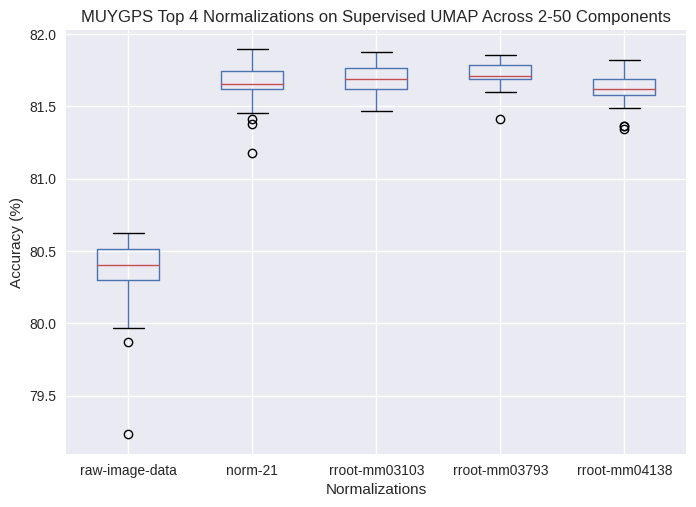

In [12]:
# plotted this first, then notice it does not give room to include the number of components
top_umap.T.boxplot()
plt.xlabel('Normalizations')
plt.ylabel('Accuracy (%)')
plt.title(r'MUYGPS Top 4 Normalizations on Supervised UMAP Across 2-50 Components')
plt.savefig('top_umap.png', dpi=500, bbox_inches='tight')
plt.show()

/tmp/ipykernel_2701278/3356459685.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


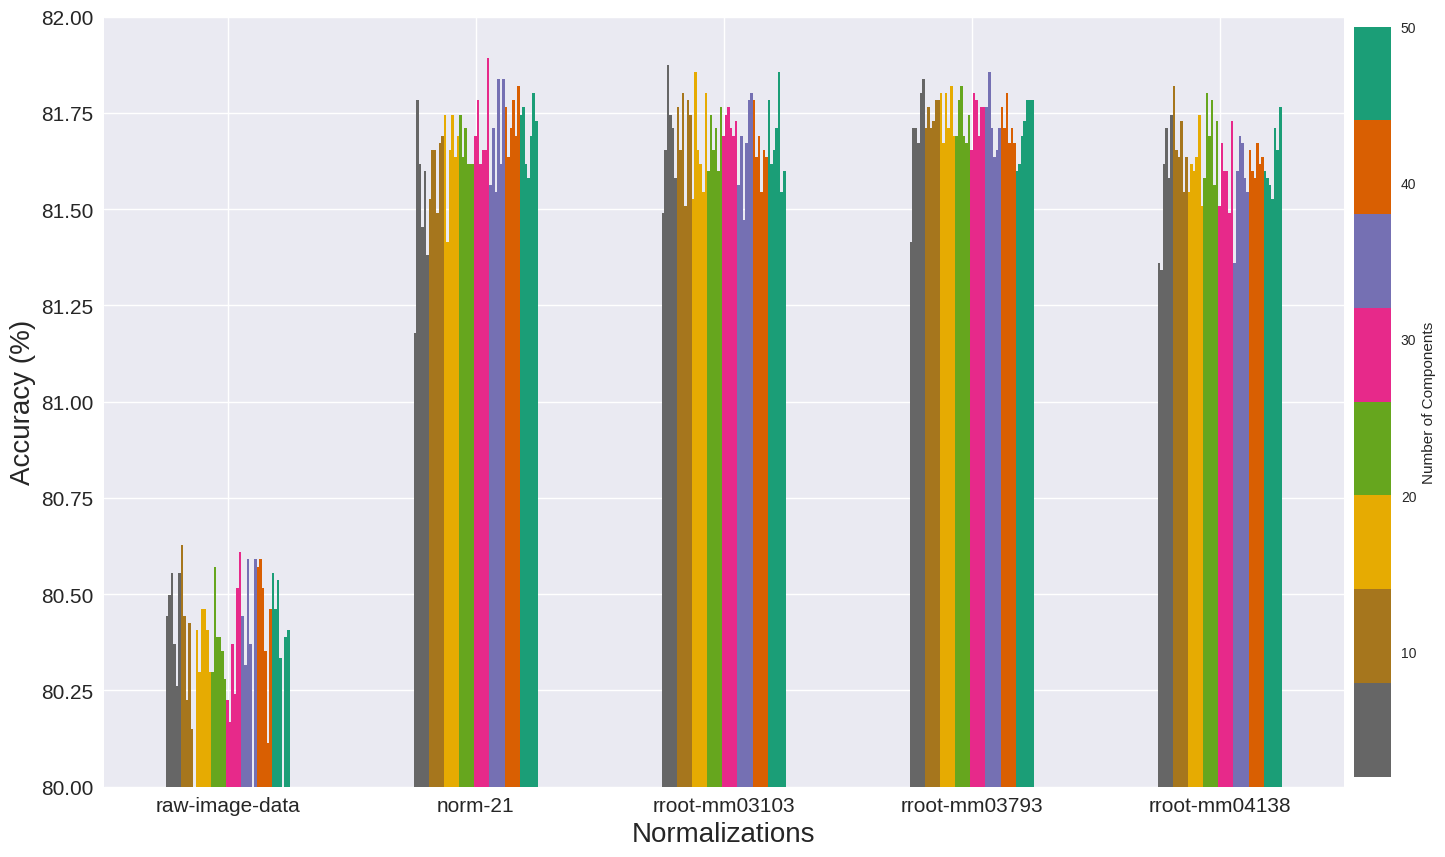

In [13]:
ax = top_umap.plot(figsize=(20,10),  kind='bar', cmap='Dark2_r', legend=False)
ax.set_xticklabels(top_umap.index, rotation=0)
ax.set_xlabel('Normalizations')
ax.set_ylabel('Accuracy (%)')
# ax.set_title(r'MUYGPS Top 4 Normalizations on Supervised UMAP Across 2-50 Components')
ax.set_ylim(80, 82)
# add colobar to the plot
sm = plt.cm.ScalarMappable(cmap='Dark2_r', norm=plt.Normalize(vmin=2, vmax=50))
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_label('Number of Components')
# customize the positin of the colorbar
cbar.ax.set_position([.75, .12, .05, .75])
# increase the size of setlabels
ax.tick_params(labelsize=15)
# increase the size of titles and labels
ax.title.set_size(25)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.savefig('top_umap.png', dpi=500, bbox_inches='tight')
plt.show()

In [14]:
# determine at what number of components the accuracy is highest for the top 4 normalizations and also the max accuracy
print(top_umap.idxmax(axis=1))
top_umap.max(axis=1)


raw-image-data     8-cps
norm-21           31-cps
rroot-mm03103      4-cps
rroot-mm03793     33-cps
rroot-mm04138      8-cps
dtype: object


raw-image-data    80.627
norm-21           81.893
rroot-mm03103     81.875
rroot-mm03793     81.857
rroot-mm04138     81.820
dtype: float64

### Analysis of Supervised UMAP results for max all normalizations

In [15]:
results = pd.read_csv('muygps-umap-results-max-all.csv', index_col=0)
#rename index to rroot istead of nthroot
results.index = results.index.str.replace('nthroot', 'rroot')
# drop row with norm_11 index since it does not follow nomenclature
# note that this normalzation does not perform any better
# results.drop('norm_11', inplace=True)
results

,2-cps,3-cps,4-cps,5-cps,6-cps,7-cps,8-cps,9-cps,10-cps
rroot_07586_data,79.527,78.976,79.123,78.921,79.141,79.178,79.086,79.196,79.160
norm_4_data,80.095,80.205,80.462,80.224,80.205,80.389,80.297,80.407,80.426
rroot_02759,78.701,78.187,78.444,78.481,78.518,78.720,78.573,78.609,78.371
rroot_003448,78.224,78.444,78.408,78.059,78.224,78.224,78.426,78.334,78.463
rroot_02414_data,79.160,79.288,79.086,79.252,79.508,79.673,79.417,79.288,79.417
rroot_01034,78.041,78.261,78.499,78.609,78.353,78.664,78.609,78.536,78.077
rroot_08966_data,79.472,79.307,79.490,79.343,79.362,79.453,78.885,79.343,79.472
rroot_006897,78.408,78.261,78.353,78.151,78.408,78.609,78.609,78.389,78.481
rroot_01379,78.187,78.646,78.279,78.664,78.279,78.848,78.298,78.646,78.426
rroot_08621_data,79.031,79.105,79.380,79.215,79.105,79.490,79.233,79.160,79.160
